In [1]:
import matplotlib.pyplot as plt
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *
from dpet.utils import set_verbosity


set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.

ens_codes = [
    # IDPConformerGenerator ensemble with not experimental bias.
    Ensemble('PED00156e001', database='ped'),
    # IDPConformerGenerator ensemble with secondary structure biased by chemical shift data.
    Ensemble('PED00157e001', database='ped'),
    # Ensemble generated with the ENSEMBLE method with experimental biases.
    Ensemble('PED00158e001', database='ped'),
    # IdpGAN ensemble, unbiased.

]

data_dir = '/home/hamid/PED_Data_analysis/nikola'  # Add the path to a directory you wish in order to save the analysis
analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories()
vis = Visualization(analysis);

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


array([<Axes: title={'center': 'PED00156e001'}, xlabel='SASA (nm$^2$)', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='SASA (nm$^2$)'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='SASA (nm$^2$)'>],
      dtype=object)

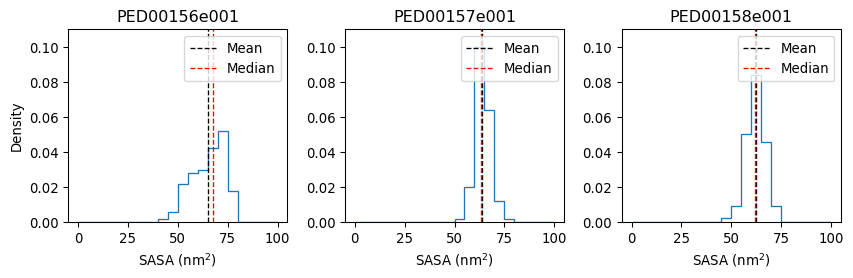

In [2]:
vis.global_sasa(bins=20, violin_plot=False,hist_range=(0, 100),summary_stat='both', multiple_hist_ax=True, save=True, dpi=96, color='blue')

<Axes: title={'center': 'End-to-End Distances Distribution'}, ylabel='$R_{ee} [nm]$'>

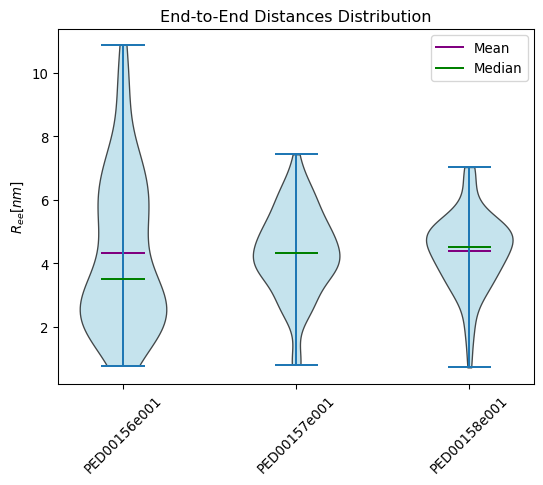

In [3]:
vis.end_to_end_distances(bins=10, violin_plot= True,multiple_hist_ax=True, hist_range=(0, 5), summary_stat='both')

array([<Axes: title={'center': 'PED00156e001'}, xlabel='Asphericity', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='Asphericity'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='Asphericity'>],
      dtype=object)

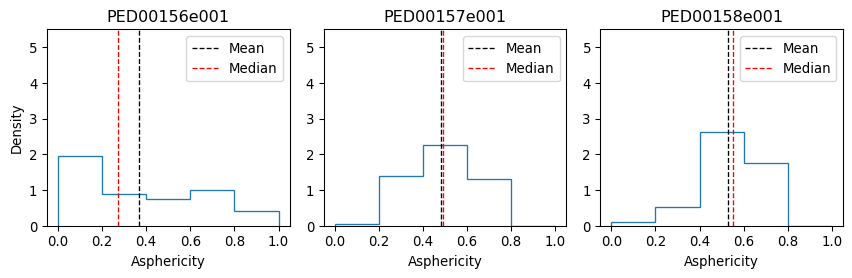

In [5]:
vis.asphericity(bins=5, violin_plot=False, multiple_hist_ax=True, hist_range=(0, 1), summary_stat='both')

Pearson coeff for PED00156e001 = -0.624
Pearson coeff for PED00157e001 = 0.087
Pearson coeff for PED00158e001 = -0.02


<Axes: title={'center': 'Rg vs. Prolateness'}, xlabel='Radius of Gyration ($R_g$) [nm]', ylabel='Prolateness'>

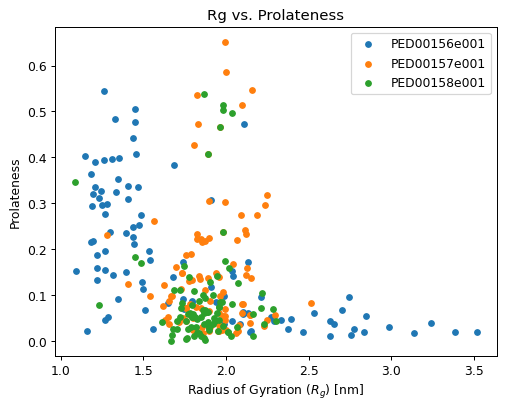

In [6]:
vis.rg_vs_prolateness(verbose=False, save=True, dpi=89, size=20)

<Axes: title={'center': 'Helix Content per Residue in the Ensemble'}, xlabel='Residue Index', ylabel='Relative Content of Helix'>

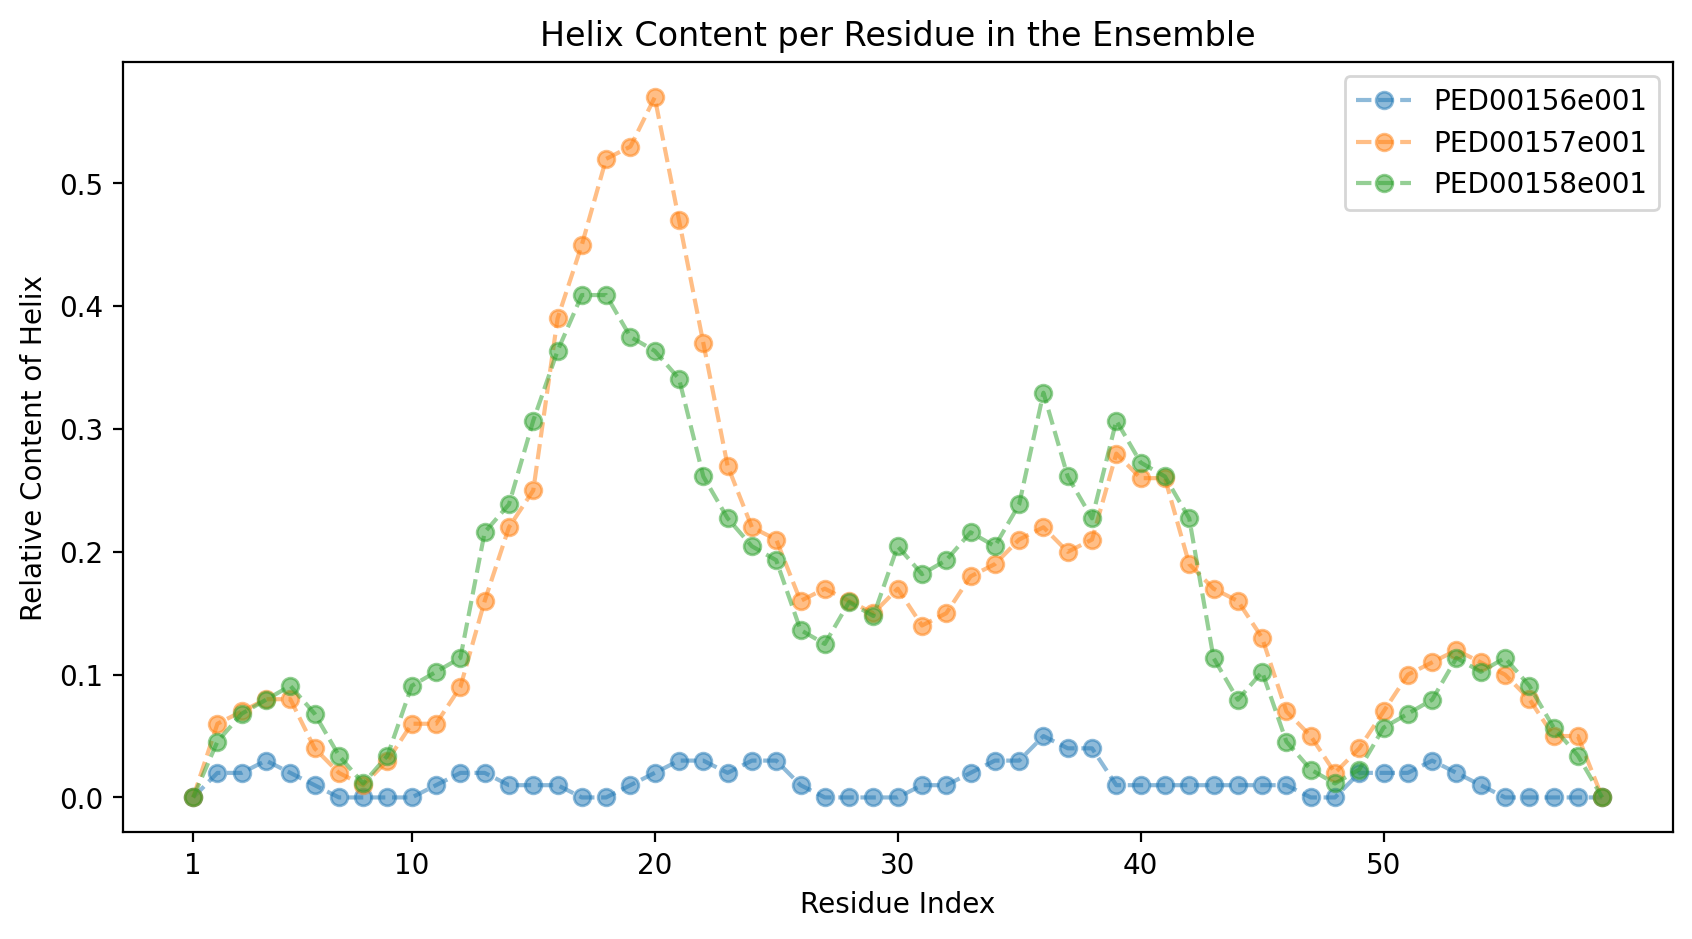

In [ ]:
vis.relative_dssp_content(dssp_code='H',auto_xticks=False ,xtick_interval=10, dpi=200, save=True)

/home/hamid/Desktop/Ensemble_tool/EnsembleTools/dpet/visualization.py:1658: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


array([<Axes: title={'center': 'PED00156e001'}, xlabel='$R_{g} [nm]$', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='$R_{g} [nm]$'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='$R_{g} [nm]$'>],
      dtype=object)

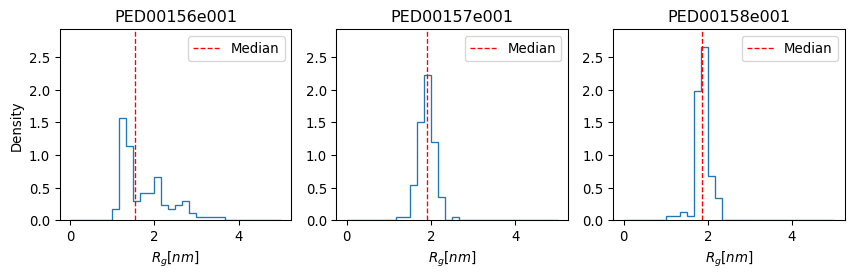

In [4]:
vis.radius_of_gyration(bins=30, violin_plot=False, multiple_hist_ax=True, hist_range=(0, 5), summary_stat='median', dpi=96, save=True)

# Ensemble: PED00156e001
features: (100, 1653)
# Ensemble: PED00157e001
features: (100, 1653)
# Ensemble: PED00158e001
features: (88, 1653)


[<Axes: title={'center': 'PED00156e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00156e001 COM'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00157e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00157e001 COM'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00158e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00158e001 COM'}, xlabel='j', ylabel='i'>]

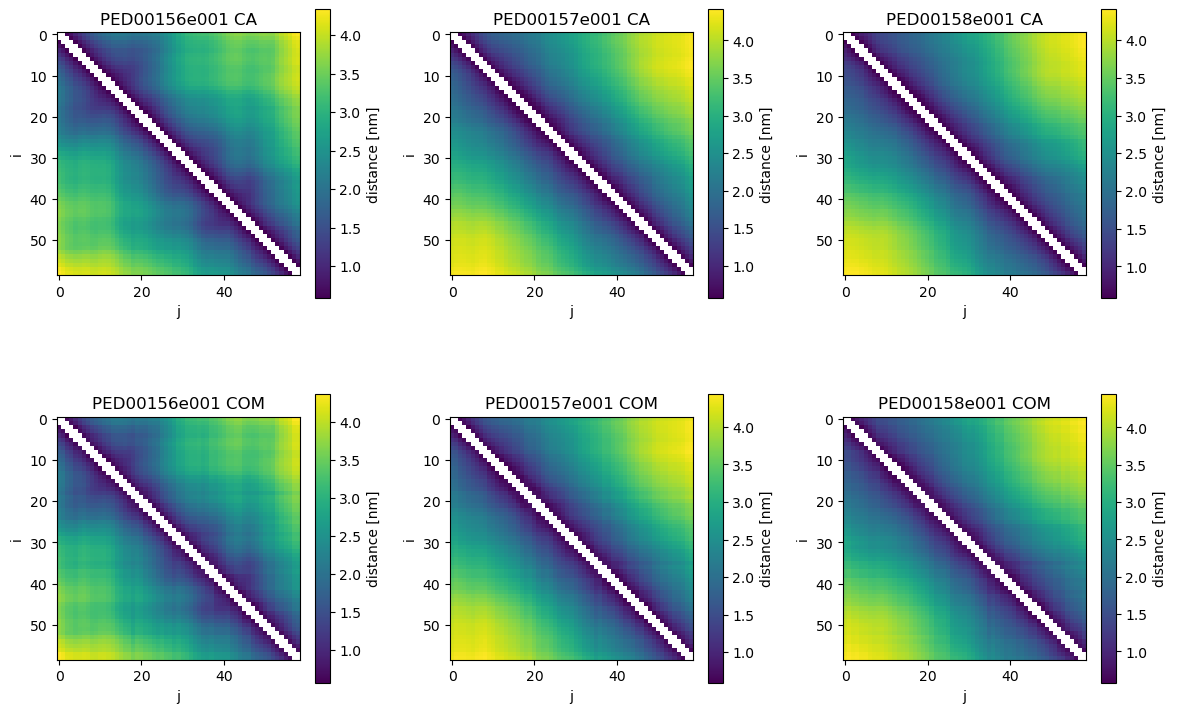

In [4]:
vis.distance_maps(min_sep=2,max_sep=None, distance_type='both', dpi=100,inverse=False ,save=True, get_names=True)

array([<Axes: title={'center': 'PED00156e001'}, xlabel='Prolateness', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='Prolateness'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='Prolateness'>],
      dtype=object)

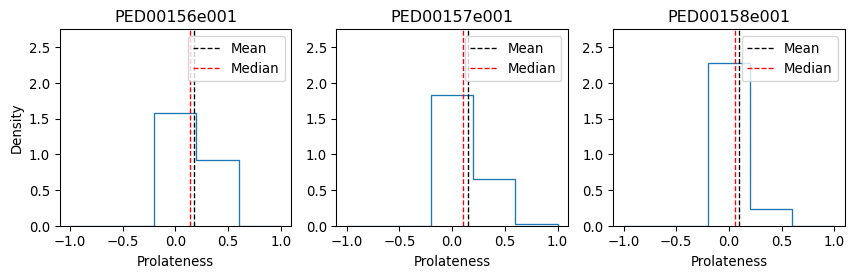

In [5]:
vis.prolateness(bins=5,violin_plot=False, multiple_hist_ax=True, summary_stat='both', hist_range=(-1, 1), dpi=96, save=True)

array([<Axes: title={'center': 'PED00156e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='j', ylabel='i'>],
      dtype=object)

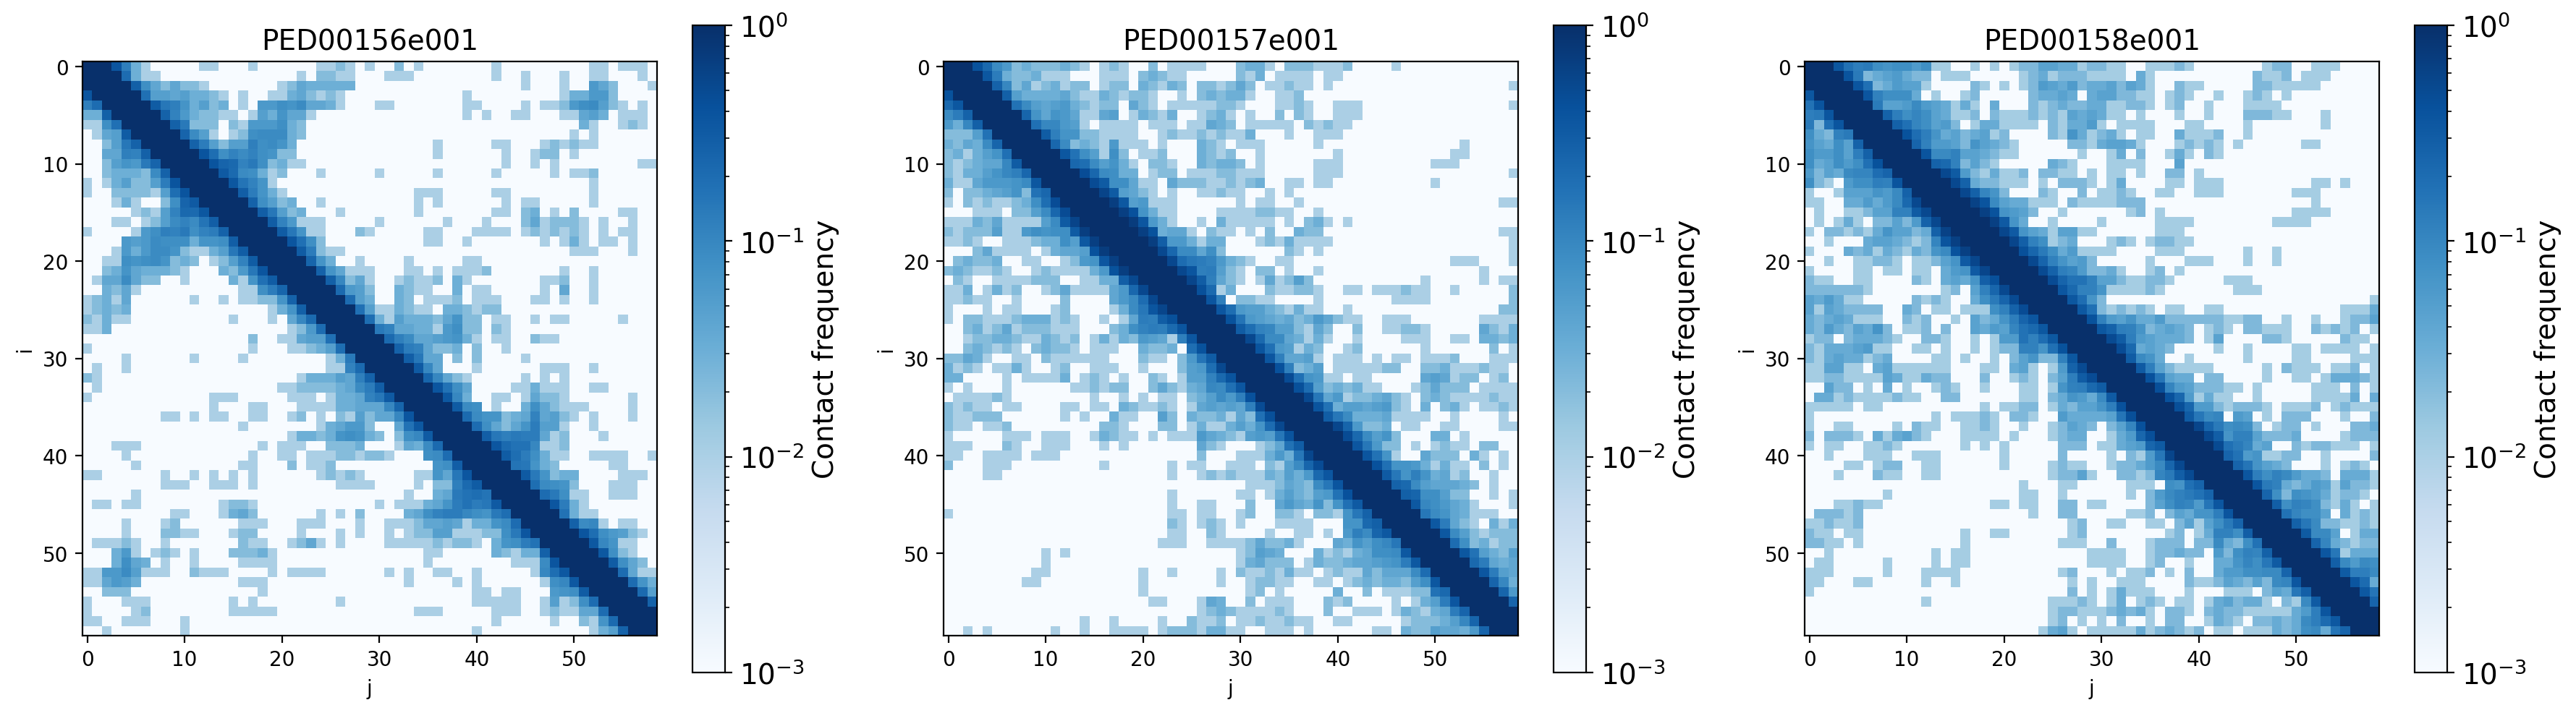

In [2]:
vis.contact_prob_maps(avoid_zero_count=True, dpi=200, save=True, log_scale=True, color='Blues', threshold=0.7)

array([<Axes: title={'center': 'Ramachandran Plot for Ensemble PED00156e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for Ensemble PED00157e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for Ensemble PED00158e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

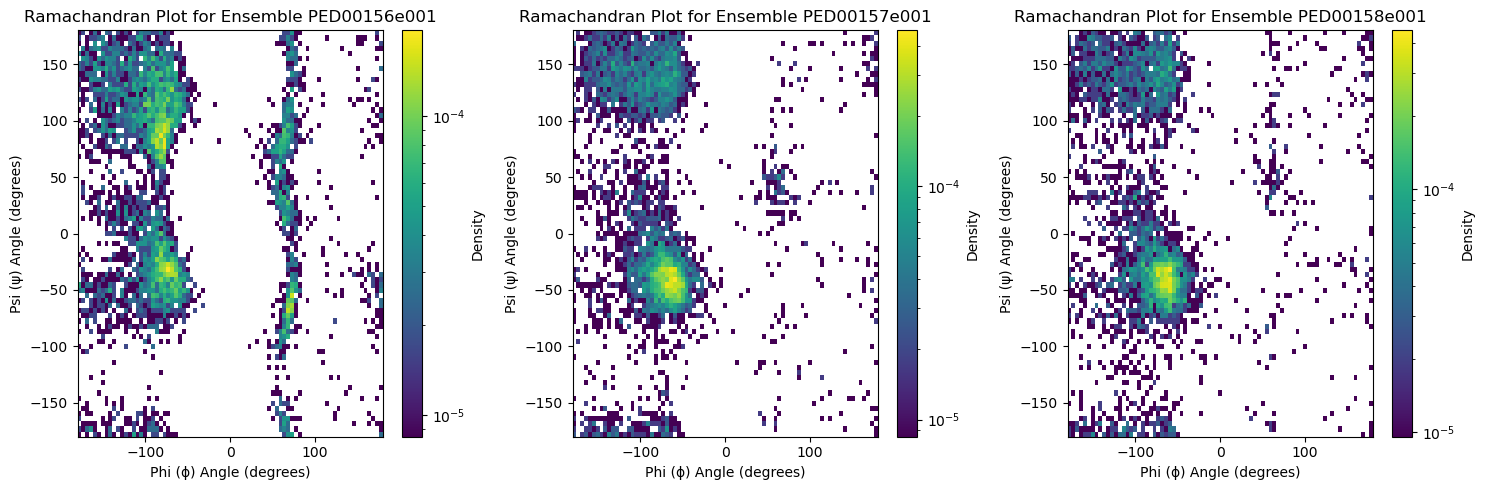

In [3]:
vis.ramachandran_plots()